# REPORTE 7

## Alexander Du-Bois Arana

## Código: 20200323

### Lectura

La lectura de Chetty et al. busca entender qué efectos a largo plazo tiene en los niños vivir en un mejor vecindario. Para ello plantean su pregunta de investigación de la siguiente manera: ¿cómo es que el vecindario donde crece un niño afecta su performance en el futuro, como atender la universidad, sus ingresos, su vida sexual, etc? Para ello van a comparar a niños que se han movido de vecindario con los que no en diferentes edades, utilizando la data de un experimento social realizado por el ministerio de Desarrollo Urbano de EEUU llamado Moving to Opportunity (MTO), luego de que estos niños hayan cumplido 18 años.

Una fortaleza de esta investigación es la gran cantidad de variables que se usaron para medir la performance a largo plazo. Entre estas encontramos el ingreso individual de niños, el ingreso de su hogar, la cantidad de jóvenes que atienden o atendieron a la universidad, así como la calidad de estas universidades, las características del vecindario donde viven como adultos, su estado civil y fertilidad, así como su pago de impuestos. Esto genera que las mediciones para entender si el cambio de vecindario de los niños afectó su futuro tengan diferentes aristas de las cuales analizarse, y no se queden en una revisión básica de los ingresos, que podrían verse afectados por otras variables. La performance en el futuro tiene muchas ramas, y creo que los autores hacen un buen trabajo en reconocerlas. Asimismo, otro punto a favor de la investigación es el uso de una variable instrumental para asegurarse que el efecto del cambio de vecindario si es una efecto causal sobre el futuro de los jóvenes. Esto se debe a que la asignación de los vouchers de dinero para la mudanza otorgados en el experimento de MTO fue aleatoria. Por lo tanto, esta asignación es reconocida y usada por los investigadores para controlar el efecto de la mudanza en las demás variables, asegurando poder sacar concluciones de mecanismos causales válidas. 

Sin embargo, el trabajo también presenta algunas debilidades. A pesar de que estas relaciones causales se controlen por la variable instrumental de los vouchers, existe otra variable que no se puede controlar: la edad con la que los niños se mudaron. Los autores idenitifican que al no saberse esta edad, no se puede aplicar la causalidad para todos los datos del MTO, ya que la edad con la que los niños se mudan podría estar correlacionada a otros factores no tomados en cuenta. Es por esto también que en los resultados finales solo fueron significativos para los niños menores a 13 años al momento de mudarse, mientras que no fueron significativos para aquellos que se mudaron teniendo entre 13 y 18 años. Es por eso que la investigación queda limitada a solo poder afirmar mecanismos causales sobre el vecindario para el grupo de niños menores a 13, ya que no se puede controlar la variable edad tal y como se hizo con los vouchers.

Acerca del conocimiento sobre la pregunta, los autores utilizan la data del experimento de MTO para probar dos hipótesis: que moverse a un mejor vecindario (menos pobre) genera que los niños que fueron jóvenes en la mudanza tengan mejores ingresos en el futuro; y que las ganancias de moverse a una nueva área declinan si el niño tiene más edad al momento de la mudanza. Para esto, se utilizó la aleatoriedad del MTO, donde se asignó a las familias participantes en 3 grupos: el control, que no recibió ayuda; el experimental, donde se les dio vouchers con dinero para mudarse a un área específica; y la sección 8, que también recibió el dinero, pero no indicaciones de a qué área mudarse. Luego de esto, se analizó la situación de aquellos niños que tenían más de 18 años al momento de la investigación. La investigación encuentra que sí existe un efecto significativo asociado con vivir en un buen vecindario y tener un buen rendimiento en el futuro. Sin embargo, este efecto es mucho más profundo cuando la mudanza a un buen vecindario se hace cuando los niños son pequeños, lo que va acorde con otras investigaciones que fundamentan que estos cambios son más efectivos en una edad temprana de desarrollo. Asimismo, programas como MTO son definitivamente positivos para generar mejores ingresos económicos en las familias, mejor planeamiento, así como mayores pagadores de impuestos. Pero lo importante es reconocer que los resultados se maximizaron si este tipo de reolcación se realiza con niños pequeños, incluso lo más cercano a su nacimiento.

Uno de los próximos avances que se podría realizar para este tipo de investigaciones podría ser analizar no solo el vecindario a donde se mudan los niños, sino el colegio al que atiendan. Podríamos observar si el colegio al que se cambian los niños afecta su rendimiento a futuro, probablemente utilizando la misma data de MTO. Asimismo, la pandemia y el cambio a la virtualidad podrían ser un estudio interesante para evaluar cómo esta cambio pudo haber afectado el rendimiento de los alumos, y cómo estos dos años podrían tener consecuencias en el futuro. Por otro lado, el tema de la migración también podría ser trabajado para entender los efectos de los movimientos en el redimiento a futuro de las personas desplazadas, tendiendo en cuenta el vecindario donde se asientan. Por ejemplo, el trabajo de Becker y Ferrara (2019), podría ser un buen inicio para entender cómo la migración forzada genera diferentes resultados en educación, ingresos o afinidades políticas que la migración voluntaria. Asimismo, existen estudios que estudian los patrones de movilización según la segregación de ingreso esperado, como el trabajo de Moro et al. (2021), que analiza como las interacciones sociales y el movimiento de personas cambia las distribuciones de segregación de ingresos en las ciudades, y no solo el lugar de residencia. Este tipo de trabajos nos permitirían tener un mejor entendimiento de cómo el lugar donde se vive cambia nuestra performance, pero también nuestras expectativos y nuestras interacciones sociales.

Bibliografía:

- Becker, S. O., & Ferrara, A. (2019). Consequences of forced migration: A survey of recent findings. Labour Economics, 59, 1-16.

- Chetty, R., Hendren, N., & Katz, L. F. (2016). The effects of exposure to better neighborhoods on children: New evidence from the moving to opportunity experiment. American Economic Review, 106(4), 855-902.

- Moro, E., Calacci, D., Dong, X., & Pentland, A. (2021). Mobility patterns are associated with experienced income segregation in large US cities. Nature communications, 12(1), 1-10.

### Código

In [70]:
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

In [71]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [72]:
# creado una columna extra para clasificar
data_2 = (data
 .assign(Formato_de_clase = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online lessons", "blended format"],
     default="face to face" #create a new variable
 ))) #group by the new variable (treatments)

In [73]:
data_2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,Formato_de_clase
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face to face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face to face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended format
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended format
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online lessons
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended format
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online lessons
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online lessons
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online lessons


#### Ploteo de Histogramas

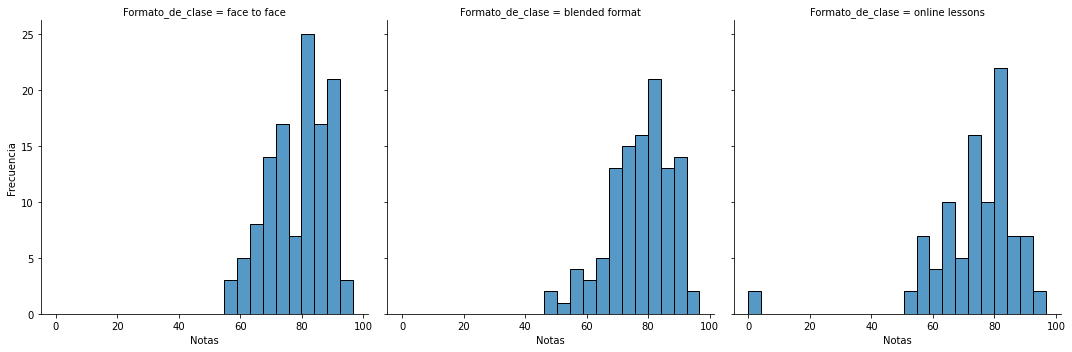

In [74]:
g = sns.displot(data=data_2, x="falsexam", col="Formato_de_clase", stat="count")
g.set(xlabel = "Notas", ylabel = "Frecuencia")

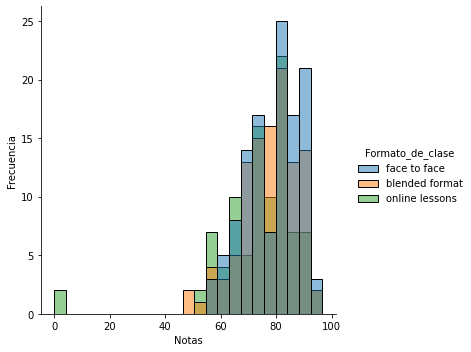

In [75]:
h = sns.displot(data=data_2, x="falsexam", hue="Formato_de_clase", stat="count")
h.set(xlabel = "Notas", ylabel = "Frecuencia")

Si analizamos las diferencias en la distribución de notas entre los 3 histogramas, podemos ver que el grupo "face to face" es que el que tiene una distribución con notas más altas que los demás grupos. Le sigue el grupo "blended format", con notas un poco más bajas, y finalmente, la distribución con notas más bajas sería la de "online lessons". Si embargo, también se puede observar que la diferencia entre las notas no es tan grande, ya que la mayoría de las notas se mantienen en el rango de 60 a 90 de puntaje de notas, donde el grupo "face to face" acumula más notas con puntajes más altos. El único caso atípico serían las notas de 0 en la categoría de "online lessons". Gracias a estos datos, podemos decir que tener aquellos alumnos que tuvieron clases presenciales tuvieron mejores notas que los que tuvieron clases híbridas o virtuales.

#### Difference-in-means estimator

In [76]:
data_3 = data_2

In [77]:
data_3["Formato_de_clase"] = data_3["Formato_de_clase"].astype("category")
print(data_3)

     gender  asian  black  hawaiian  hispanic  unknown  white  format_ol  \
0         0    0.0    0.0       0.0       0.0      0.0    1.0          0   
1         1    0.0    0.0       0.0       0.0      0.0    1.0          0   
2         1    0.0    0.0       0.0       0.0      0.0    1.0          0   
3         1    0.0    0.0       0.0       0.0      0.0    1.0          0   
4         1    0.0    0.0       0.0       0.0      0.0    1.0          1   
..      ...    ...    ...       ...       ...      ...    ...        ...   
318       0    0.0    0.0       0.0       0.0      0.0    1.0          0   
319       1    NaN    NaN       NaN       NaN      NaN    NaN          1   
320       0    NaN    NaN       NaN       NaN      NaN    NaN          1   
321       1    NaN    NaN       NaN       NaN      NaN    NaN          1   
322       1    0.0    0.0       0.0       0.0      0.0    1.0          0   

     format_blended  falsexam Formato_de_clase  
0               0.0  63.29997     face

In [78]:
data_3["Formato_de_clase"] = data_3["Formato_de_clase"].cat.remove_categories("blended format")

In [79]:
data_3.head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,Formato_de_clase
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face to face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face to face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,NaN
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,NaN
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online lessons


In [80]:
data_3.groupby(["Formato_de_clase"]).mean()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
Formato_de_clase,,,,,,,,,,
face to face,0.633333,0.202020,0.070707,0.000000,0.010101,0.0,0.717172,0.0,0.0,78.547485
online lessons,0.542553,0.228571,0.028571,0.014286,0.028571,0.0,0.700000,1.0,0.0,73.635263


In [81]:
73.635263 - 78.547485

-4.912222

Lo que acabamos de hacer nos ha dado el ATT, es decir, el Average Treatment Effect, que en este caso es de -4.91. Esto significa que los alumnos que toman clases online tienen notas aproximadamente 5 puntos peores que aquellos que llevan clases presenciales.

#### Difference-in-means estimator via linear regression

In [82]:
data_3['dummy_clase'] = data_3.Formato_de_clase.map({'online lessons':1, 'face to face':0})

In [83]:
data_3.head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,Formato_de_clase,dummy_clase
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face to face,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face to face,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,NaN,NaN
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,NaN,NaN
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online lessons,1


In [84]:
ols_reg = sm.OLS.from_formula("falsexam ~ dummy_clase", 
              data = data_3).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Sun, 06 Nov 2022   Prob (F-statistic):            0.00382
Time:                        13:13:47   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           78.5475      1.113     70.563      0.000      76.353      80.742
dummy_clase[T.1]    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""